In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [2]:
Data = pd.read_excel(r"C:\Users\Padma Jothi\Desktop\Capstone\Copper_Set.xlsx")

In [3]:
Data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
Data.shape

(181673, 14)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
Data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
Data.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

## CONVERTING OBJECT TO DATETIME FORMAT

In [8]:
Data['item_date'] = pd.to_datetime(Data['item_date'], format='%Y%m%d',errors='coerce')
Data['delivery date'] = pd.to_datetime(Data['delivery date'], format='%Y%m%d',errors='coerce')

In [9]:
Data['item_date']

0        2021-04-01
1        2021-04-01
2        2021-04-01
3        2021-04-01
4        2021-04-01
            ...    
181668   2020-07-02
181669   2020-07-02
181670   2020-07-02
181671   2020-07-02
181672   2020-07-02
Name: item_date, Length: 181673, dtype: datetime64[ns]

In [10]:
Data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons            object
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [11]:
print(Data["item_date"].min())
print(Data["item_date"].max())

2020-07-02 00:00:00
2021-04-01 00:00:00


In [12]:
print(Data["delivery date"].min())
print(Data["delivery date"].max())

2019-04-01 00:00:00
2022-01-01 00:00:00


## Feature Engineering

In [13]:
convert_column_names = ["quantity tons","customer","country","application","thickness","width","selling_price"]
for i in convert_column_names:
    Data[i] = pd.to_numeric(Data[i],errors="coerce")
Data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [14]:
Data.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

## Filtering the Material_ref column

In [15]:
Data["material_ref"] = Data["material_ref"].apply(lambda x:np.nan if str(x).startswith('0000')else x)
Data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [16]:
Data.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,2020-07-01,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,2020-07-01,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,2020-07-01,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,2020-07-01,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,2020-07-02,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,NaN,164141591,2020-07-01,607.0


In [17]:
Data.isna().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

## Drop Material_ref Column

In [18]:
Data.drop(columns=['material_ref'],inplace=True)
Data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [19]:
Data.isna().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [20]:
null_id = Data[Data['id'].isna()]

In [21]:
null_id

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
26,NaN,2021-04-01,15.927990,30271717.0,28.0,To be approved,W,10.0,0.8,1000.0,611993,2021-07-01,1208.0
104566,NaN,2020-11-13,27.096376,30197989.0,27.0,Won,W,59.0,2.8,959.0,640665,2020-12-01,551.0



## Drop ID Column

In [22]:
Data.drop(columns=['id'],inplace=True)
Data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [23]:
Data.isna().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

## FILLNA VALUES 

## Filling Null values in Numerical Column with median values

In [24]:
Data.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181670,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,181670,1.816720e+05
mean,2020-11-26 22:56:58.127374080,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2021-01-25 22:44:26.223372032,1.918036e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,NaN,3.317956e+05


In [25]:
Data['quantity tons'].fillna(Data['quantity tons'].median(),inplace=True)
Data['country'].fillna(Data['country'].median(),inplace=True)
Data['thickness'].fillna(Data['thickness'].median(),inplace=True)
Data['application'].fillna(Data['application'].median(),inplace=True)
Data['selling_price'].fillna(Data['selling_price'].median(),inplace=True)

In [26]:
Data.isna().sum()

item_date        3
quantity tons    0
customer         1
country          0
status           2
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    3
selling_price    0
dtype: int64

## Filling Null values in Categorical columns with mode

In [27]:
Data['customer'].fillna(Data['customer'].mode().iloc[0],inplace=True)
Data['item_date'].fillna(Data['item_date'].mode().iloc[0],inplace=True)
Data['status'].fillna(Data['status'].mode().iloc[0],inplace=True)
Data['delivery date'].fillna(Data['delivery date'].mode().iloc[0],inplace=True)

In [28]:
Data["country"]=Data["country"].astype('int64')

In [29]:
Data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

# Converting to csv file

In [30]:
Data.to_csv('Copper_cleaning.csv',index=False)

# EDA

In [31]:
eda_data = Data.copy(True)

In [32]:
eda_data.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                   int64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

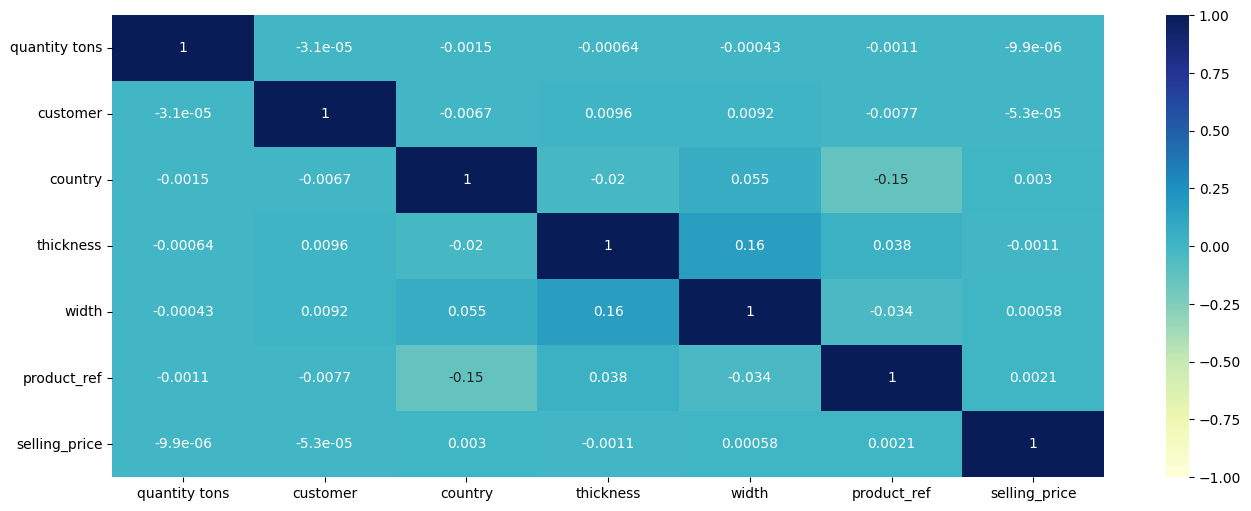

In [33]:
x = eda_data[['quantity tons','customer','country','thickness','width','product_ref','selling_price']].corr()
plt.figure(figsize=(16,6))
sns.heatmap(x,annot= True,vmin = -1,cmap="YlGnBu")
plt.show()

## Outliers and Skewness

#### Using Boxplot and Distplot

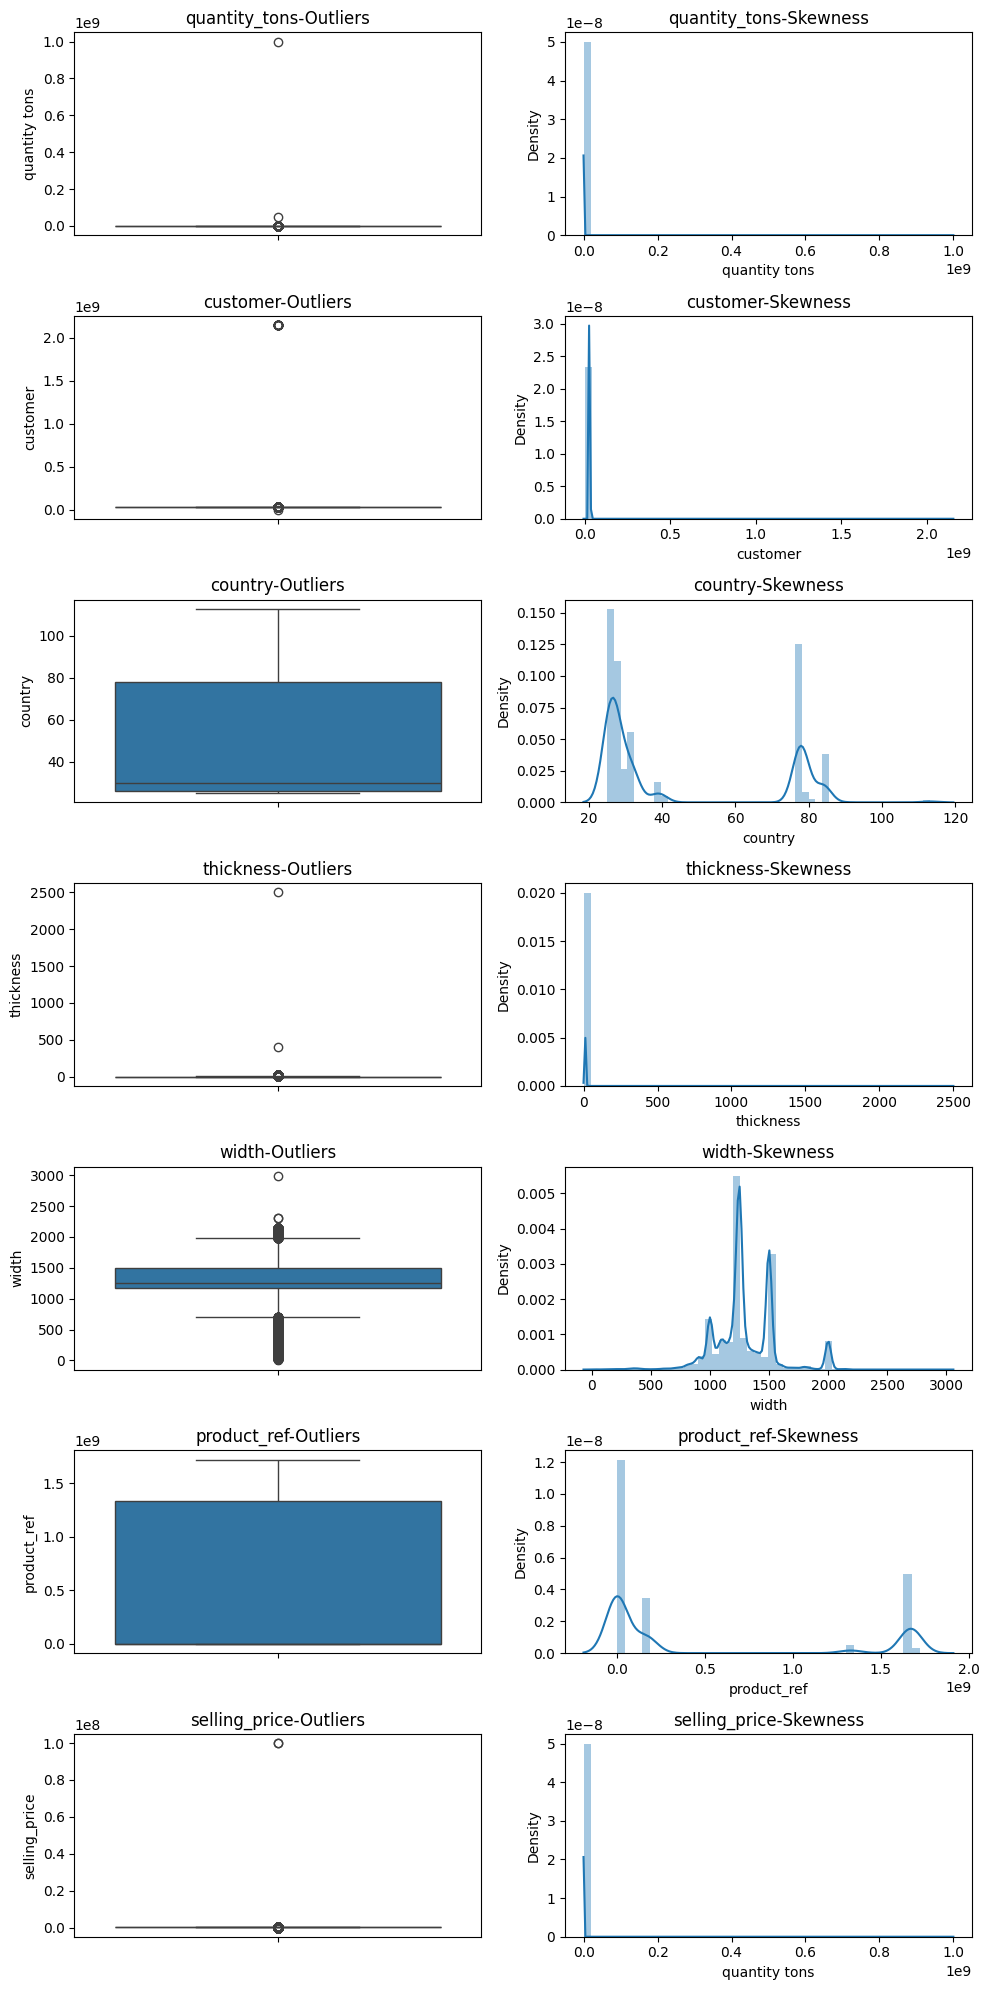

In [34]:
#Creating a figure with subplots
fig,axes = plt.subplots(7,2,figsize=(10,20))

sns.boxplot(ax=axes[0,0],data=eda_data['quantity tons'])    #quantity tons
axes[0,0].set_title('quantity_tons-Outliers')
sns.distplot(ax=axes[0,1],a=eda_data['quantity tons'])
axes[0,1].set_title('quantity_tons-Skewness')

sns.boxplot(ax=axes[1,0],data=eda_data['customer'])         #customer
axes[1,0].set_title('customer-Outliers')
sns.distplot(ax=axes[1,1],a=eda_data['customer'])
axes[1,1].set_title('customer-Skewness')

sns.boxplot(ax=axes[2,0],data=eda_data['country'])          #country
axes[2,0].set_title('country-Outliers')
sns.distplot(ax=axes[2,1],a=eda_data['country'])
axes[2,1].set_title('country-Skewness')

sns.boxplot(ax=axes[3,0],data=eda_data['thickness'])        #thickness
axes[3,0].set_title('thickness-Outliers')
sns.distplot(ax=axes[3,1],a=eda_data['thickness'])
axes[3,1].set_title('thickness-Skewness')

sns.boxplot(ax=axes[4,0],data=eda_data['width'])            #width
axes[4,0].set_title('width-Outliers')
sns.distplot(ax=axes[4,1],a=eda_data['width'])
axes[4,1].set_title('width-Skewness')

sns.boxplot(ax=axes[5,0],data=eda_data['product_ref'])      #product_ref
axes[5,0].set_title('product_ref-Outliers')
sns.distplot(ax=axes[5,1],a=eda_data['product_ref'])
axes[5,1].set_title('product_ref-Skewness')

sns.boxplot(ax=axes[6,0],data=eda_data['selling_price'])    #selling_price
axes[6,0].set_title('selling_price-Outliers')
sns.distplot(ax=axes[6,1],a=eda_data['quantity tons'])
axes[6,1].set_title('selling_price-Skewness')

plt.tight_layout()
plt.show()

In [35]:
eda_data.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181673,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,181673,1.816730e+05
mean,2020-11-26 22:57:05.323521024,5.874894e+03,3.051221e+07,44.890727,25.614406,2.564822,1295.286724,4.739679e+08,2021-01-25 22:43:50.629757696,1.918029e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.097037e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716038e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349075e+06,2.433375e+07,24.403034,17.753421,6.572303,261.631754,7.175101e+08,NaN,3.317947e+05


## Skewness

In [36]:
out_skew_data = eda_data.copy(True)

In [37]:
out_skew_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


## Data Transformation

In [38]:
skewed_columns = ['quantity tons','thickness','selling_price']
for column in skewed_columns:
    neg = (out_skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    out_skew_data.loc[neg,column] = np.nan

quantity tons : 4 
thickness : 0 
selling_price : 7 


In [39]:
out_skew_data.isna().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [40]:
out_skew_data.dropna(inplace=True)

In [41]:
out_skew_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [42]:
out_skew_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [43]:
out_skew_data_1=out_skew_data.copy(True)
out_skew_data_1=out_skew_data_1.drop(['item_date','delivery date','status','item type'],axis=1)

In [44]:
out_skew_data_1.skew()

quantity tons    424.677959
customer          86.982674
country            0.753768
application        0.724624
thickness         15.291361
width              0.374564
product_ref        1.015276
selling_price    301.378964
dtype: float64

## Outliers

In [ ]:
outliers_columns = ['quantity tons','thickness','width','selling_price']

In [47]:
from scipy import stats

for column in outliers_columns:
    z_scores = stats.zscore(out_skew_data[column])
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    final_data = out_skew_data[filtered_entries]

# Final statistics after removing outliers with Z-score method
final_stats = final_data[outliers_columns].describe()

print("Final Statistics after removing outliers using Z-score method:")
print(final_stats)

Final Statistics after removing outliers using Z-score method:
       quantity tons      thickness          width  selling_price
count  175639.000000  175639.000000  175639.000000  175639.000000
mean       94.782477       2.252465    1294.711009     818.677624
std       423.923485       2.130565     243.103977     224.424669
min         0.000010       0.180000     520.000000       0.100000
25%        11.001551       0.700000    1180.000000     672.000000
50%        30.444995       1.500000    1250.000000     815.000000
75%        67.649238       3.000000    1500.000000     957.000000
max     70252.363068      11.400000    2060.000000    1720.000000


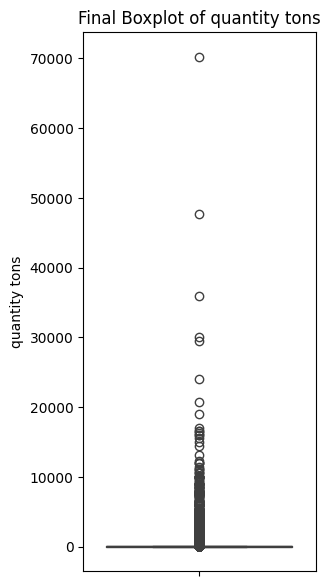

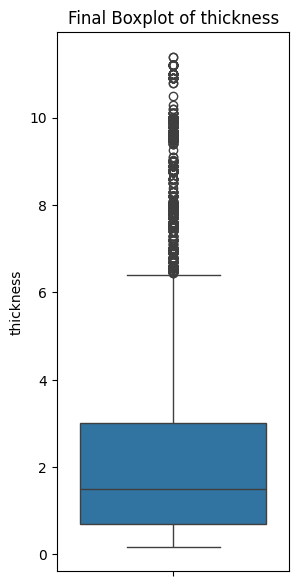

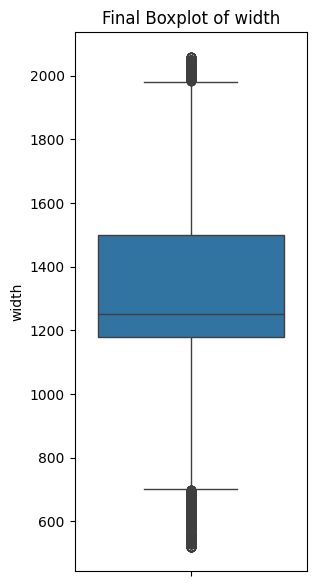

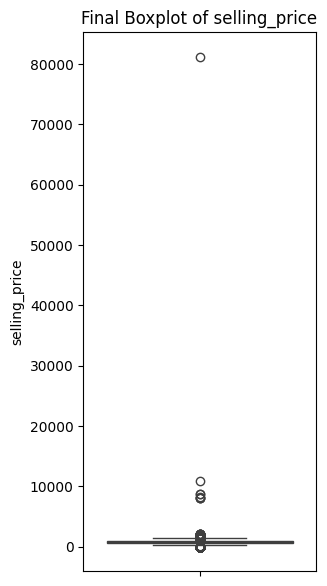

In [48]:
# Final boxplots after using Z-score method
for col in outliers_columns:
    plt.figure(figsize=(3,7))
    sns.boxplot(y=out_skew_data[col])
    plt.title(f'Final Boxplot of {col}')
    plt.show()

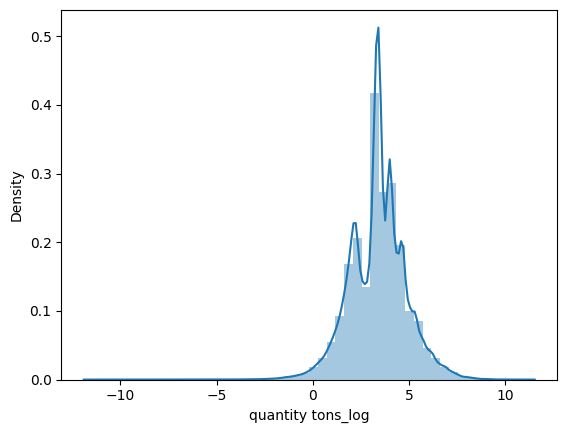

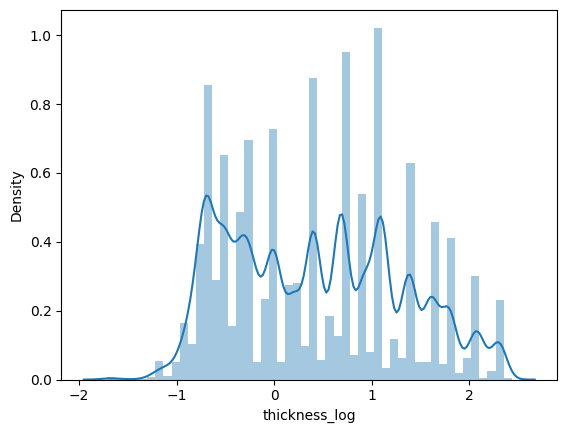

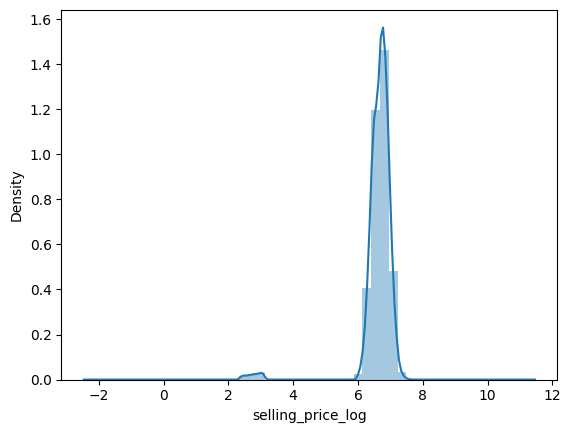

In [47]:
out_skew_data['quantity tons_log'] = np.log(out_skew_data['quantity tons'])
sns.distplot(out_skew_data['quantity tons_log'])
plt.show()

#out_skew_data['customer_log'] = np.sqrt(out_skew_data['customer'])
#sns.distplot(out_skew_data['customer_log'])
#plt.show()

out_skew_data['thickness_log'] = np.log(out_skew_data['thickness'])
sns.distplot(out_skew_data['thickness_log'])
plt.show()

out_skew_data['selling_price_log'] = np.log(out_skew_data['selling_price'])
sns.distplot(out_skew_data['selling_price_log'])
plt.show()

In [48]:
out_skew_data['delivery_time_taken']=(out_skew_data['item_date']-out_skew_data['delivery date']).abs().dt.days
out_skew_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1.670799e+09,2021-07-01,854.00,3.991779,0.693147,6.749931,91
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1.668702e+09,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,6.283770e+05,2021-01-01,644.33,5.956169,-0.967584,6.468211,90
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1.668702e+09,2021-01-01,768.00,5.310301,0.832909,6.643790,90
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,6.406650e+05,2021-03-01,577.00,6.666354,1.386294,6.357842,31


In [49]:
out_skew_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175747 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            175747 non-null  datetime64[ns]
 1   quantity tons        175747 non-null  float64       
 2   customer             175747 non-null  float64       
 3   country              175747 non-null  float64       
 4   status               175747 non-null  object        
 5   item type            175747 non-null  object        
 6   application          175747 non-null  float64       
 7   thickness            175747 non-null  float64       
 8   width                175747 non-null  float64       
 9   product_ref          175747 non-null  float64       
 10  delivery date        175747 non-null  datetime64[ns]
 11  selling_price        175747 non-null  float64       
 12  quantity tons_log    175747 non-null  float64       
 13  thickness_log      

In [50]:
out_skew_data.select_dtypes(include=np.number)

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1.670799e+09,854.00,3.991779,0.693147,6.749931,91
1,768.024839,30202938.0,25.0,41.0,0.80,1210.0,1.668702e+09,1047.00,6.643822,-0.223144,6.953684,0
2,386.127949,30153963.0,30.0,28.0,0.38,952.0,6.283770e+05,644.33,5.956169,-0.967584,6.468211,90
3,202.411065,30349574.0,32.0,59.0,2.30,1317.0,1.668702e+09,768.00,5.310301,0.832909,6.643790,90
4,785.526262,30211560.0,28.0,10.0,4.00,2000.0,6.406650e+05,577.00,6.666354,1.386294,6.357842,31
...,...,...,...,...,...,...,...,...,...,...,...,...
181667,106.783299,30200854.0,25.0,41.0,0.96,1240.0,1.641416e+08,602.00,4.670802,-0.040822,6.400257,1
181668,102.482422,30200854.0,25.0,41.0,0.96,1220.0,1.641416e+08,591.00,4.629691,-0.040822,6.381816,1
181669,208.086469,30200854.0,25.0,41.0,0.95,1500.0,1.641416e+08,589.00,5.337954,-0.051293,6.378426,1
181670,4.235594,30200854.0,25.0,41.0,0.71,1250.0,1.641416e+08,619.00,1.443523,-0.342490,6.428105,1


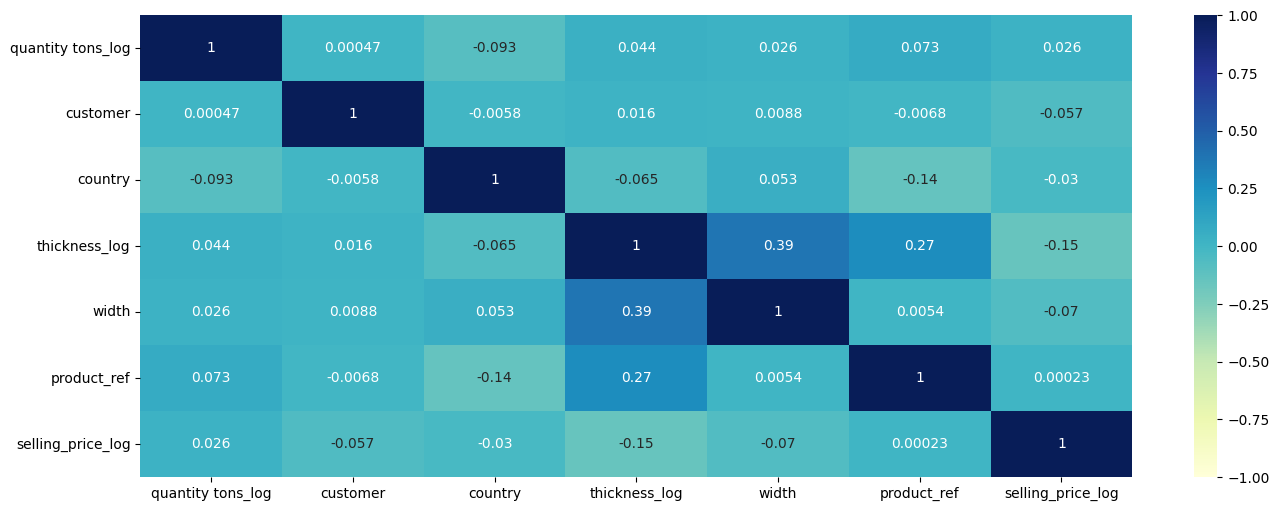

In [51]:
x = out_skew_data[['quantity tons_log','customer','country','thickness_log','width','product_ref','selling_price_log']].corr()
plt.figure(figsize=(16,6))
sns.heatmap(x,annot= True,vmin = -1,cmap="YlGnBu")
plt.show()

## Finding Unique Values

In [52]:
status=out_skew_data['status'].unique()
item=out_skew_data['item type'].unique()
print(status)
print(item)

['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


## Encode the Categorical Column

## Status

In [53]:
encode=OrdinalEncoder()
out_skew_data['status'] = encode.fit_transform(out_skew_data[['status']])
transformed_status=out_skew_data['status'].unique()

transformed_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

## Item Type

In [54]:
encode=OrdinalEncoder()
out_skew_data["item type"] = encode.fit_transform(out_skew_data[["item type"]])
transformed_item=out_skew_data["item type"].unique()

transformed_item

array([5., 6., 3., 1., 2., 0., 4.])

## After Encoding the Categorical column

In [55]:
for i, j in zip(status, transformed_status):
    print('After encoding :',i,'----- encoded :',j)

After encoding : Won ----- encoded : 7.0
After encoding : Draft ----- encoded : 0.0
After encoding : To be approved ----- encoded : 6.0
After encoding : Lost ----- encoded : 1.0
After encoding : Not lost for AM ----- encoded : 2.0
After encoding : Wonderful ----- encoded : 8.0
After encoding : Revised ----- encoded : 5.0
After encoding : Offered ----- encoded : 4.0
After encoding : Offerable ----- encoded : 3.0


In [56]:
for i,j in zip(item, transformed_item):
    print('After encoding :',i,'----- encoded :',j)

After encoding : W ----- encoded : 5.0
After encoding : WI ----- encoded : 6.0
After encoding : S ----- encoded : 3.0
After encoding : Others ----- encoded : 1.0
After encoding : PL ----- encoded : 2.0
After encoding : IPL ----- encoded : 0.0
After encoding : SLAWR ----- encoded : 4.0


## Loading and Storing with Pickle

In [57]:
import pickle

file_path3='status.pkl'
file_path4='item type.pkl'

with open(file_path3, 'wb') as file:
    pickle.dump(transformed_status, file)
with open(file_path4, 'wb') as file:
    pickle.dump(transformed_item, file)

print(f'Pickle file created: {file_path3},{file_path4}')

Pickle file created: status.pkl,item type.pkl


In [58]:
import pickle
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)

encode_status

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

In [59]:
category_col=['status', 'item type']
encoder= OrdinalEncoder()
for i in category_col:
    print(i)
    out_skew_data[i] = encoder.fit_transform(out_skew_data[[i]])
    print(out_skew_data[i].unique())

status
[7. 0. 6. 1. 2. 8. 5. 4. 3.]
item type
[5. 6. 3. 1. 2. 0. 4.]


In [60]:
out_skew_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28.0,7.0,5.0,10.0,2.00,1500.0,1.670799e+09,2021-07-01,854.00,3.991779,0.693147,6.749931,91
1,2021-04-01,768.024839,30202938.0,25.0,7.0,5.0,41.0,0.80,1210.0,1.668702e+09,2021-04-01,1047.00,6.643822,-0.223144,6.953684,0
2,2021-04-01,386.127949,30153963.0,30.0,7.0,6.0,28.0,0.38,952.0,6.283770e+05,2021-01-01,644.33,5.956169,-0.967584,6.468211,90
3,2021-04-01,202.411065,30349574.0,32.0,7.0,3.0,59.0,2.30,1317.0,1.668702e+09,2021-01-01,768.00,5.310301,0.832909,6.643790,90
4,2021-04-01,785.526262,30211560.0,28.0,7.0,5.0,10.0,4.00,2000.0,6.406650e+05,2021-03-01,577.00,6.666354,1.386294,6.357842,31


## Scaling

In [61]:
X = out_skew_data[['quantity tons_log','thickness_log','width','country','status','item type', 'application','product_ref','delivery_time_taken']]
y = out_skew_data[['selling_price']]

#Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [62]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(123022, 9) (52725, 9) (123022, 1) (52725, 1)


In [63]:
import pickle
file_path5='scaling.pkl'
with open(file_path5, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path5}')

Pickle file created: scaling.pkl


In [64]:
with open('scaling.pkl', 'rb') as file:
    scaler = pickle.load(file)

## Regression Model for predicting the selling price

In [65]:
RF_Model = RandomForestRegressor()
ET_Model = ExtraTreesRegressor()
DTR_Model = DecisionTreeRegressor()

RF_Model.fit(X_train,y_train)
ET_Model.fit(X_train,y_train)
DTR_Model.fit(X_train,y_train)

#Make predictions on the tests
RF_Preds = RF_Model.predict(X_test)
ET_Preds = ET_Model.predict(X_test)
DTR_Preds = DTR_Model.predict(X_test)

#Evaluate the models
RF_MSE = mean_squared_error(y_test,RF_Preds)
ET_MSE = mean_squared_error(y_test,ET_Preds)
DTR_MSE = mean_squared_error(y_test,DTR_Preds)

RF_R2 = r2_score(y_test,RF_Preds)
ET_R2 = r2_score(y_test,ET_Preds)
DTR_R2 = r2_score(y_test,DTR_Preds)


print(f"RandomForestRegressor  MSE:{RF_MSE}, R2:{RF_R2}")
print(f"ExtraTreeRegressor  MSE:{ET_MSE}, R2:{ET_R2}")
print(f"DecisionTreeRegressor   MSE:{DTR_MSE}, R2:{DTR_R2}")

RandomForestRegressor  MSE:74241.39302391565, R2:-0.3980183054053552
ExtraTreeRegressor  MSE:8815.29669256163, R2:0.8340016850194274
DecisionTreeRegressor   MSE:133766.52599677574, R2:-1.5189189531200236


In [66]:
import pickle
file_path6='RandomForestRegression.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(RF_Model, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: RandomForestRegression.pkl


In [67]:
with open('RandomForestRegression.pkl', 'rb') as file:
    RF_Model = pickle.load(file)

RF_Model

RandomForestRegressor()

In [68]:
import pickle
file_path9='ExtraTreeRegression.pkl'
with open(file_path9, 'wb') as file:
    pickle.dump(ET_Model, file)
print(f'Pickle file created: {file_path9}')

Pickle file created: ExtraTreeRegression.pkl


In [69]:
with open('ExtraTreeRegression.pkl','rb') as file:
    ET_Model = pickle.load(file)

ET_Model

ExtraTreesRegressor()

## Classification Model for predicting the Status Won or Lost

In [70]:
X = out_skew_data[['quantity tons_log','thickness_log','width','country','selling_price_log','item type', 'application','product_ref','delivery_time_taken']].values
y = out_skew_data[['status']].values

#Standard Scaler
scaler_classify = StandardScaler()
X_scale_classify = scaler_classify.fit_transform(X)

#Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale_classify,y,test_size=0.2,random_state=42)

In [71]:
file_path7='scaling_classify.pkl'
with open(file_path7, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path7}')

Pickle file created: scaling_classify.pkl


In [72]:
XGB_Model = XGBClassifier()
ETC_Model = ExtraTreesClassifier()
RFC_Model = RandomForestClassifier()

#Train the Models
XGB_Model.fit(X_train,y_train)
ETC_Model.fit(X_train,y_train)
RFC_Model.fit(X_train,y_train)

#Make predictions on the tests
XGB_Preds = XGB_Model.predict(X_test)
ETC_Preds  = ETC_Model.predict(X_test)
RFC_Preds = RFC_Model.predict(X_test)

#Evaluate the models
XGB_AS = accuracy_score(y_test,XGB_Preds)
ETC_AS = accuracy_score(y_test,ETC_Preds)
RFC_AS = accuracy_score(y_test,RFC_Preds)

print(f"XGBClassifier  Accuracy_Score :{XGB_AS}")
print(f"ExtraTreeClassifier  Accuracy_Score :{ETC_AS}")
print(f"RandomForestClassifier  Accuracy_Score :{RFC_AS}")

KeyboardInterrupt: 

In [ ]:
import pickle
file_path8='RandomForestClassifier.pkl'
with open(file_path8, 'wb') as file:
    pickle.dump(RFC_Model, file)
print(f'Pickle file created: {file_path8}')

Pickle file created: RandomForestClassifier.pkl


In [ ]:
with open('RandomForestClassifier.pkl', 'rb') as file:
    RFC_Model = pickle.load(file)

RFC_Model

RandomForestClassifier()

In [ ]:
import pickle
file_path10='ExtraTreeClassifier.pkl'
with open(file_path10, 'wb') as file:
    pickle.dump(ETC_Model, file)
print(f'Pickle file created: {file_path10}')

Pickle file created: ExtraTreeClassifier.pkl


In [ ]:
with open('ExtraTreeClassifier.pkl', 'rb') as file:
    ETC_Model = pickle.load(file)

ETC_Model

ExtraTreesClassifier()